In [37]:
/

In this note book I just explore the embedpy feature of kdb+/q

First of all import necessary python packages


\
p)import nltk 
p)import string  
p)import re
p)from nltk.stem import PorterStemmer

In [38]:
/load the IMBD csv file size 31MB

df:("***";enlist csv)0:`:/home/senthil/Data/Ed/repo/mlnotebooks/data/IMBD.csv

In [127]:
/ The table have three columns
cols df

`comment`tgt`ind


In [128]:
/take comment column coz this column contains list of comments in string format
df[`comment]

"If you like plot turns, this is your movie. It is impossible at any moment t..
"It's a real challenge to make a movie about a baby being devoured by wild ca..
"What a good film! Made Men is a great action movie with lots of twists and t..
"This is a movie that is bad in every imaginable way. Sure we like to know wh..
"There is something special about the Austrian movies not only by Seidl, but ..
"I never bothered to see this movie in theaters although I remember hearing t..
"Well.......in contrast to other comments previously written I have to say th..
"Unfortunately the movie is more concerned with making lame social commentary..
"This is one of the worst B slashers I've ever seen in my life. The ending is..
"\"Film noir\" is an overused expression when it comes to describing films. E..
"In the questionable comedy vein of Mel Brooks, \"Wholly Moses!\" tries to ta..
"I loved this film. I thought it would be easy to watch, and easy to forget. ..
"Growing up in a multi racial neighborho

### Data Preprocessing

In [129]:
/ Get the all punctuations from python's string module
punctuations:.p.qeval"string.punctuation"

In [28]:
/ collect the list of stop words and store it in stop_words variable.
/ I got the list of stop words from https://algs4.cs.princeton.edu/35applications/stopwords.txt
stop_words : `a`i,`$("\n" vs .Q.hg"https://algs4.cs.princeton.edu/35applications/stopwords.txt")

In [130]:
/ The tokens function does the punctuation removal and stopword removal then it will split the words based on space
tokens:{(lower(`$(" " vs (x except punctuations)))) except stop_words}

In [131]:
/ import the stemming function from python nltk package
/ Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas".
p)stemmer = PorterStemmer()
stemming:{[x] `$.p.qeval raze "stemmer.stem('",string x,"')"}

In [132]:
/ N-gram can be defined as the contiguous sequence of n items from a given sample of text or speech

ngram:{[x;n] i:0;l:();do[((count x) - n)+1;l:l,enlist (i+til n);i+:1];x[l]}

### Build frequency

In [133]:
/ build frequency function will return the dictionary which contains frequency of ngram words.

build_freq:{[x] freq::()!();{$[x in (key freq);freq[x]+:1;freq[x]:1];}'[x];:freq}

In [33]:
wrd : tokens df[`comment][0]  / remove punctuation and tokenise the word with space seperate and remove stop words.
wrd : stemming'[wrd]          / Stemming : reducing a word to its stem or root
wrd : ngram [wrd;1]           / continuous sequences of words based on n
wrd : `${"_" sv string x}'[wrd] / Finally join the n words with "_"

/build_freq [wrd]

In [134]:
/combine all functions:
build_ngram: {[x;n] build_freq `${"_" sv string x}'[ngram [stemming'[(tokens x)];n]]}

In [136]:
build_ngram[df[`comment][0];2] /Here I gave ngram=2

plot_turn      | 1
turn_movi      | 1
movi_imposs    | 1
imposs_moment  | 1
moment_predict | 1
predict_happen | 1
happen_appear  | 1
appear_end     | 1
end_charact    | 1
charact_gritti | 1
gritti_engag   | 1
engag_cage     | 1
cage_denni     | 1
denni_hopper   | 1
hopper_show    | 1
show_delight   | 1
delight_sinist | 1
sinist_side    | 1
side_jt        | 1
jt_walsh       | 1
walsh_perfect  | 1
perfect_perform| 1
..


In [137]:
word_dic:build_ngram[df[`comment][0];1] / here I gave ngram=1
show word_dic

plot   | 1
turn   | 1
movi   | 3
imposs | 1
moment | 1
predict| 1
happen | 1
appear | 1
end    | 1
charact| 1
gritti | 1
engag  | 1
cage   | 1
denni  | 1
hopper | 1
show   | 1
delight| 1
sinist | 1
side   | 1
jt     | 1
walsh  | 1
perfect| 1
..


In [27]:
/In table View
word_table:`word_count xdesc([word:(key word_dic)] word_count: value word_dic)
show word_table

word   | word_count
-------| ----------
movi   | 3         
film   | 3         
i      | 2         
plot   | 1         
turn   | 1         
imposs | 1         
moment | 1         
predict| 1         
happen | 1         
appear | 1         
end    | 1         
charact| 1         
gritti | 1         
engag  | 1         
cage   | 1         
denni  | 1         
hopper | 1         
show   | 1         
delight| 1         
sinist | 1         
..


## Word Cloud

In [139]:
get_ngram_words:{[x;n] {"_" sv string x}'[ngram [stemming'[(tokens x)];n]]}

In [142]:
/ get list of words for word cloud
d:raze " " sv get_ngram_words[df[`comment][0];2]
show d

"plot_turn turn_movi movi_imposs imposs_moment moment_predict predict_happen ..


In [143]:
p)import matplotlib.pyplot as plt

In [150]:
p)from wordcloud import WordCloud 
.p.set[`word_list;d]
p)wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(word_list)

In [152]:
p)print(word_list)

plot_turn turn_movi movi_imposs imposs_moment moment_predict predict_happen happen_appear appear_end end_charact charact_gritti gritti_engag engag_cage cage_denni denni_hopper hopper_show show_delight delight_sinist sinist_side side_jt jt_walsh walsh_perfect perfect_perform perform_laura laura_boyl boyl_sizzl sizzl_dwight dwight_yoakum yoakum_make make_film film_debut debut_superbl superbl_cameo cameo_categor categor_movi movi_bad bad_day day_film film_slow slow_minut minut_film film_real real_sleeper sleeper_movi movi_underr underr_sadli sadli_overlook


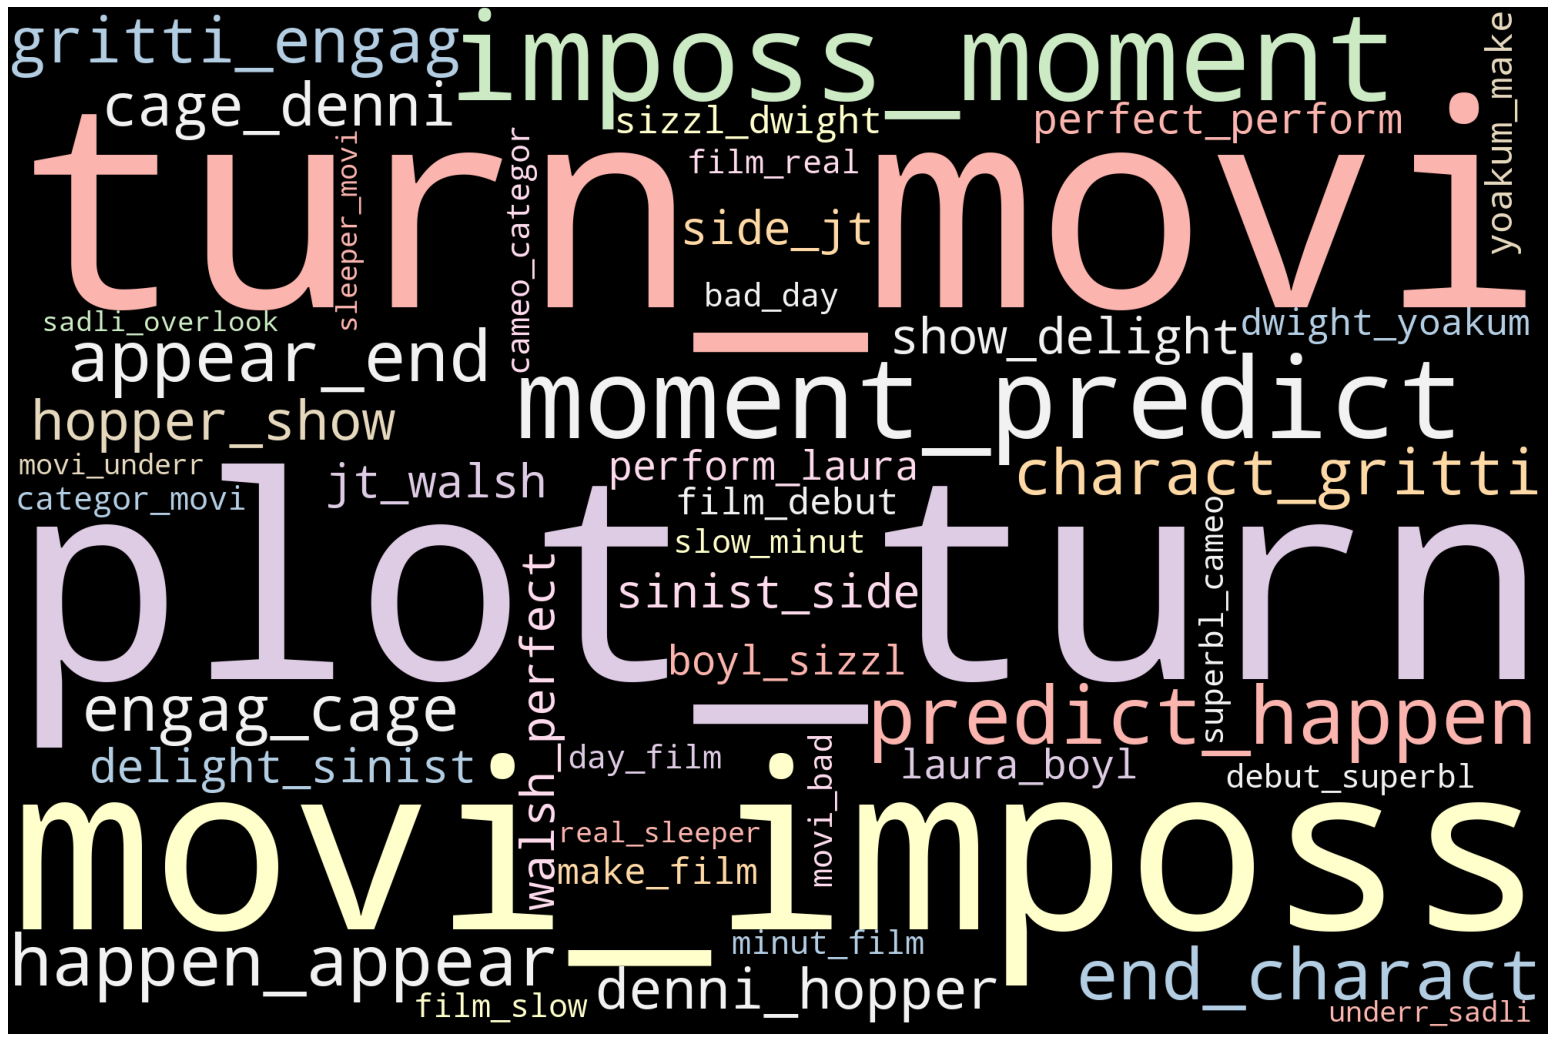

In [153]:
/ create the wordcloud
p)import matplotlib.pyplot as plt
p)from matplotlib.pyplot import figure

/ Define a function to plot word cloud
p)def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
/Plot
p)plot_cloud(wordcloud)   